In [ ]:
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
from  PIL import Image
from matplotlib import pyplot as plt

# Study of Image segmentation techniques


#1.Implement Point detection

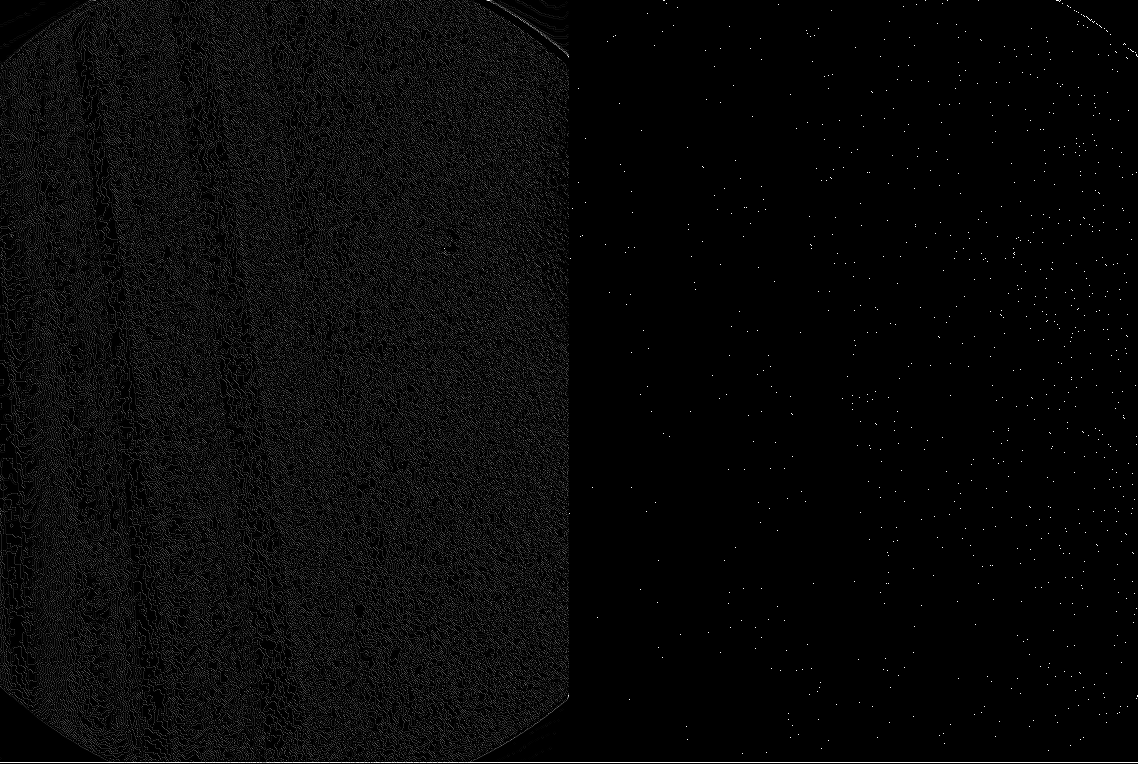

In [ ]:
img=cv2.imread("/content/point_image.bmp",0)
lap=cv2.Laplacian(img,cv2.CV_64F)
th=100
point=cv2.threshold(lap,th,255,cv2.THRESH_BINARY)[1];
concatenated_img = cv2.hconcat([lap, point])
cv2_imshow(concatenated_img)

# 2.To apply Global Thresholding

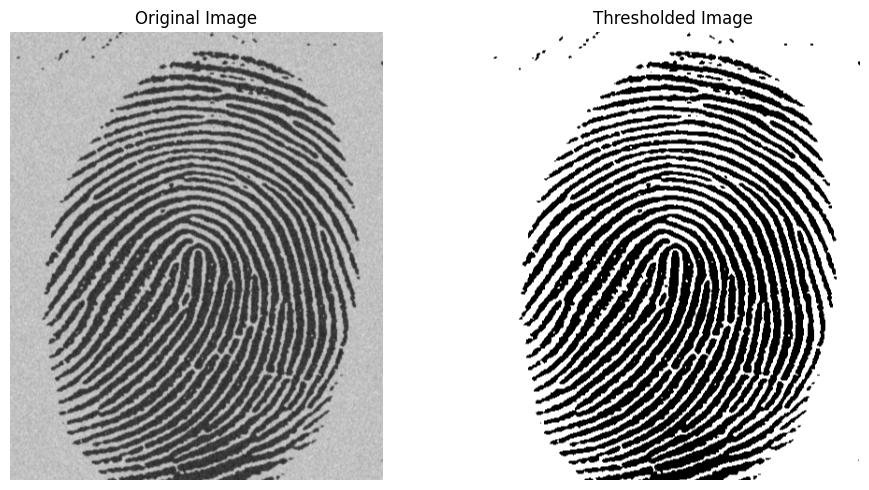

In [ ]:
def global_thre(img, delta):
    t = np.mean(img)
    while True:
        g1 = img > t
        g2 = img <= t
        m1 = np.mean(img[g1])
        m2 = np.mean(img[g2])

        new_t = (m1 + m2) / 2.0
        if abs(t - new_t) < delta:
            break

        t = new_t
        thre_img = (img > t).astype('uint8') * 255

    return thre_img

delta = 0.01
img = cv2.imread("/content/thresh_img.bmp", cv2.IMREAD_GRAYSCALE)
threh = global_thre(img, delta)

# Resize images
img_resized = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
threh_resized = cv2.resize(threh, (0, 0), fx=0.5, fy=0.5)

# Plot images using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(threh_resized, cmap='gray')
axs[1].set_title('Thresholded Image')
axs[1].axis('off')

plt.tight_layout()
plt.show()


# 3.Implement Line detection

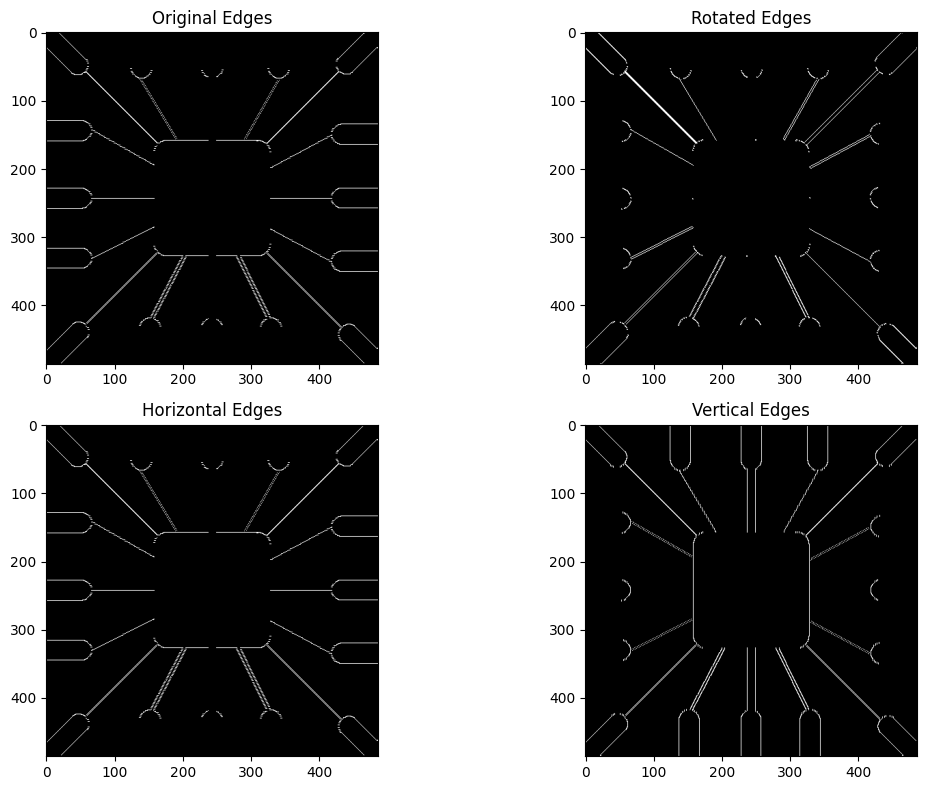

In [ ]:
# Load the image
img = cv2.imread("/content/TE2.bmp", 0)

# Define the original kernel
kernel = np.array([[-1, -1, -1],
                   [2, 2, 2],
                   [-1, -1, -1]])

# Define the 45-degree rotated kernel (3x3)
rot_kernel = np.array([[2, -1, -1],
                       [-1, 2, -1],
                       [-1, -1, 2]])

# Define the horizontal kernel
h_kernel = np.array([[-1, -1, -1],
                     [2, 2, 2],
                     [-1, -1, -1]])

# Define the vertical kernel
v_kernel = np.array([[-1, 2, -1],
                     [-1, 2, -1],
                     [-1, 2, -1]])

# Get the dimensions of the image and the kernels
img_height, img_width = img.shape[:2]
kernel_height, kernel_width = kernel.shape[:2]

# Create new images to store the edges
edges_orig = np.zeros((img_height, img_width), dtype=np.uint8)
edges_rot = np.zeros((img_height, img_width), dtype=np.uint8)
edges_h = np.zeros((img_height, img_width), dtype=np.uint8)
edges_v = np.zeros((img_height, img_width), dtype=np.uint8)

# Loop over each pixel in the image
for i in range(1, img_height - 1):
    for j in range(1, img_width - 1):
        # Multiply the original kernel with the corresponding pixel values in the image
        sum_orig = 0
        for k in range(-1, kernel_height - 1):
            for l in range(-1, kernel_width - 1):
                sum_orig += img[i + k, j + l] * kernel[k + 1, l + 1]
        edges_orig[i, j] = sum_orig

        # Multiply the 45-degree rotated kernel with the corresponding pixel values in the image
        sum_rot = 0
        for k in range(-1, kernel_height - 1):
            for l in range(-1, kernel_width - 1):
                sum_rot += img[i + k, j + l] * rot_kernel[k + 1, l + 1]
        edges_rot[i, j] = sum_rot

        # Multiply the horizontal kernel with the corresponding pixel values in the image
        sum_h = 0
        for k in range(-1, kernel_height - 1):
            for l in range(-1, kernel_width - 1):
                sum_h += img[i + k, j + l] * h_kernel[k + 1, l + 1]
        edges_h[i, j] = sum_h

        # Multiply the vertical kernel with the corresponding pixel values in the image
        sum_v = 0
        for k in range(-1, kernel_height - 1):
            for l in range(-1, kernel_width - 1):
                sum_v += img[i + k, j + l] * v_kernel[k + 1, l + 1]
        edges_v[i, j] = sum_v


# Compute the edges using the kernels
edges_orig = cv2.filter2D(img, -1, kernel)
edges_rot = cv2.filter2D(img, -1, rot_kernel)
edges_h = cv2.filter2D(img, -1, h_kernel)
edges_v = cv2.filter2D(img, -1, v_kernel)

# Add text annotations above each image
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(edges_orig, cmap='gray')
axs[0, 0].set_title('Original Edges')

axs[0, 1].imshow(edges_rot, cmap='gray')
axs[0, 1].set_title('Rotated Edges')

axs[1, 0].imshow(edges_h, cmap='gray')
axs[1, 0].set_title('Horizontal Edges')

axs[1, 1].imshow(edges_v, cmap='gray')
axs[1, 1].set_title('Vertical Edges')

plt.tight_layout()
plt.show()

